<a href="https://colab.research.google.com/github/Henrique-Vicentini/case_tempo_estudo/blob/main/prova_1_horas_estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar bibliotecas
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/horas_estudo.csv', sep = ';')

In [ ]:
df.head()

,horas_estudo,nota_avaliacao
0,"16,07","40,05"
1,"20,41","66,49"
2,"34,29","91,5"
3,"34,1","87,09"
4,"32,34","69,3"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   horas_estudo    100 non-null    object
 1   nota_avaliacao  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [ ]:
def tirar_virgula(numero):
  numero = numero.replace(',' , '.')
  return numero

In [ ]:
df['horas_estudo'] = df['horas_estudo'].apply(tirar_virgula)
df['nota_avaliacao'] = df['nota_avaliacao'].apply(tirar_virgula)

In [ ]:
df.head()

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.5
3,34.1,87.09
4,32.34,69.3


In [ ]:
df['horas_estudo'] = df['horas_estudo'].astype(float)
df['nota_avaliacao'] = df['nota_avaliacao'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horas_estudo    100 non-null    float64
 1   nota_avaliacao  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,horas_estudo,nota_avaliacao
count,100.000000,100.000000
mean,20.766000,64.222600
std,10.731428,22.000436
min,0.380000,10.300000
25%,13.287500,47.505000
50%,19.815000,62.380000
75%,29.767500,84.540000
max,39.160000,100.000000


In [ ]:
df['horas_estudo'].mean()

20.766000000000005

In [ ]:
df['nota_avaliacao'].mean()

64.2226

<Axes: >

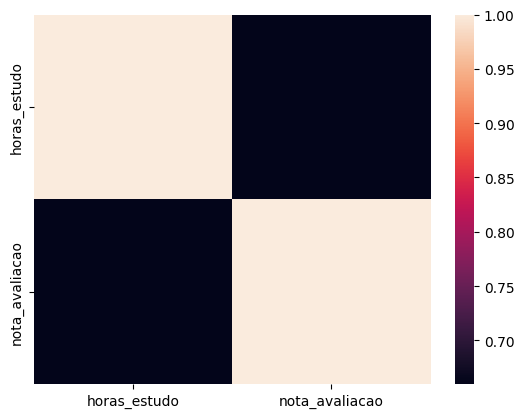

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,horas_estudo,nota_avaliacao
horas_estudo,1.000000,0.659759
nota_avaliacao,0.659759,1.000000


# Modelagem

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['horas_estudo']]
y = df[['nota_avaliacao']]

In [ ]:
model_lr = LinearRegression()

model_lr.fit(x ,  y)

LinearRegression()

In [ ]:
#encontrar a constante da reta, ponto que intercepta o eixo y
constante = model_lr.intercept_
constante

array([36.13518584])

In [ ]:
#achar o coeficiente
coef = model_lr.coef_
coef

array([[1.35256738]])

In [ ]:
#nota predita para um aluno que estudo 3 horas
model_lr.predict([[3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[40.19288797]])

In [ ]:
#nota predita para um aluno que estudo 18.06 horas

model_lr.predict([[18.06]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[60.56255268]])

In [ ]:
df[df['horas_estudo'] == 18.06]

,horas_estudo,nota_avaliacao
23,18.06,62.32


In [ ]:
#nota predita para um aluno que estudo 30 horas

model_lr.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.71220716]])

In [ ]:
model_lr.score(x,y)

0.43528156504806215

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [ ]:
predicao = model_lr.predict(x)
x['predicao'] = predicao

In [ ]:
#calcular o esse absoluto

MAE = mean_absolute_error(y, x['predicao'])
MAE

12.83868977098035

In [ ]:
#calcular o erro médio quadrado

MSE = mean_squared_error(y, x['predicao'])
MSE

270.601202088843